# Machine learning with PyCaret
### Popular ML Libraries

+ Scikit-learn
+ Tensorflow
+ Keras
+ Pytorch
+ Caffe
+ PyCaret

## PyCaret

+ PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.
+ It is a wrapper around several popular ML and Data Science libraries
+ Official website: [https://pycaret.org](https://pycaret.org/)

### Installation

+ !pip install pycaret

### Workflow

+ Prep Data
+ Initialize Setup
 + Define the data and the target class
+ Compare Model
+ Create Model
 + Select the one you want
+ Check accuracy of a selected model -predict
+ Tune model
+ Evaluate model
+ Intepret Model
+ Save model


In [ ]:
# Installation
!pip install pycaret

In [1]:
# Load EDA Pkgs
import pandas as pd

In [2]:
# Matplolib Environments
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [3]:
# Matplolib inline
%matplotlib inline

In [4]:
# Load Dataset Method 1
from google.colab import files 
files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


{'heart_failure_clinical_records_dataset.csv': b'age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT\n75,0,582,0,20,1,265000,1.9,130,1,0,4,1\n55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1\n65,0,146,0,20,0,162000,1.3,129,1,1,7,1\n50,1,111,0,20,0,210000,1.9,137,1,0,7,1\n65,1,160,1,20,0,327000,2.7,116,0,0,8,1\n90,1,47,0,40,1,204000,2.1,132,1,1,8,1\n75,1,246,0,15,0,127000,1.2,137,1,0,10,1\n60,1,315,1,60,0,454000,1.1,131,1,1,10,1\n65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1\n80,1,123,0,35,1,388000,9.4,133,1,1,10,1\n75,1,81,0,38,1,368000,4,131,1,1,10,1\n62,0,231,0,25,1,253000,0.9,140,1,1,10,1\n45,1,981,0,30,0,136000,1.1,137,1,0,11,1\n50,1,168,0,38,1,276000,1.1,137,1,0,11,1\n49,1,80,0,30,1,427000,1,138,0,0,12,0\n82,1,379,0,50,0,47000,1.3,136,1,0,13,1\n87,1,149,0,38,0,262000,0.9,140,1,0,14,1\n45,0,582,0,14,0,166000,0.8,127,1,0,14,1\n70,1,125,0,25,1,237000,1,140,0,0,15,1\n48,1,582,1,55,0,87000,1.9,1

We use the 'heart_failure_clinical_records_dataset.csv' from [Heart failure clinical records Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

In [5]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [6]:
df.head()

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]

In [ ]:
# Load Dataset Method2
# Datasource
data_url = "https://raw.githubusercontent.com/Jcharis/data-science-projects/master/data-science-projects/notebooks/data/heart_failure_clinical_records_dataset.csv"

In [ ]:
# Load Dataset
df = pd.read_csv(data_url)

In [7]:
# Shape
df.shape

(299, 13)

In [8]:
# Check for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
# Columns
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
# Rename A Column
df.rename(columns={'DEATH_EVENT':'class'},inplace=True)

In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'class'],
      dtype='object')

In [12]:
# Descriptive Stas
df.describe()

age     anaemia  ...        time      class
count  299.000000  299.000000  ...  299.000000  299.00000
mean    60.833893    0.431438  ...  130.260870    0.32107
std     11.894809    0.496107  ...   77.614208    0.46767
min     40.000000    0.000000  ...    4.000000    0.00000
25%     51.000000    0.000000  ...   73.000000    0.00000
50%     60.000000    0.000000  ...  115.000000    0.00000
75%     70.000000    1.000000  ...  203.000000    1.00000
max     95.000000    1.000000  ...  285.000000    1.00000

[8 rows x 13 columns]

In [13]:
# Value Count Plot
df['class'].value_counts()

0    203
1     96
Name: class, dtype: int64

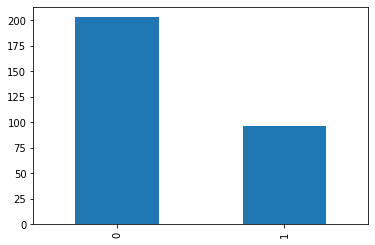

In [14]:
df['class'].value_counts().plot(kind='bar')

## Using PyCaret for ML

In [15]:
import pycaret.classification

In [16]:
# Methods/Attrib
dir(pycaret.classification)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'create_stacknet',
 'deploy_model',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'interpret_model',
 'load_experiment',
 'load_model',
 'optimize_threshold',
 'plot_model',
 'predict_model',
 'save_experiment',
 'save_model',
 'setup',
 'stack_models',
 'tune_model']

In [17]:
# Simplify way
import pycaret.classification as pc

In [18]:
dir(pc)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'create_stacknet',
 'deploy_model',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'interpret_model',
 'load_experiment',
 'load_model',
 'optimize_threshold',
 'plot_model',
 'predict_model',
 'save_experiment',
 'save_model',
 'setup',
 'stack_models',
 'tune_model']

### Initialize or Setup

+ setup()
+ initializes the environment in pycaret
+ creates the transformation pipeline to prepare the data for ML
+ from pycaret.utils import enable_colab
+ enable_colab()



In [19]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [20]:
# Init
# Enter Y for all variables in dataset
# Specify % of data for train/test/split
clf = pc.setup(data=df,target='class')

 
Setup Succesfully Completed!


In [21]:
# Ignore A Column
pc.setup(data=df,target='class',ignore_features=['age','diabetes'])

 
Setup Succesfully Completed!


(     creatinine_phosphokinase  platelets  ...  sex_1  smoking_1
 0                       582.0  265000.00  ...    1.0        0.0
 1                      7861.0  263358.03  ...    1.0        0.0
 2                       146.0  162000.00  ...    1.0        1.0
 3                       111.0  210000.00  ...    1.0        0.0
 4                       160.0  327000.00  ...    0.0        0.0
 ..                        ...        ...  ...    ...        ...
 294                      61.0  155000.00  ...    1.0        1.0
 295                    1820.0  270000.00  ...    0.0        0.0
 296                    2060.0  742000.00  ...    0.0        0.0
 297                    2413.0  140000.00  ...    1.0        1.0
 298                     196.0  395000.00  ...    1.0        1.0
 
 [299 rows x 26 columns], 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 294    0
 295    0
 296    0
 297    0
 298    0
 Name: class, Length: 299, dtype: int64,      creatinine_phosphokinase  platelets  

In [25]:
# We use all features
pc.setup(data=df,target='class')

 
Setup Succesfully Completed!


(      age  creatinine_phosphokinase  ...  sex_0  smoking_0
 0    75.0                     582.0  ...    0.0        1.0
 1    55.0                    7861.0  ...    0.0        1.0
 2    65.0                     146.0  ...    0.0        0.0
 3    50.0                     111.0  ...    0.0        1.0
 4    65.0                     160.0  ...    1.0        1.0
 ..    ...                       ...  ...    ...        ...
 294  62.0                      61.0  ...    0.0        0.0
 295  55.0                    1820.0  ...    1.0        1.0
 296  45.0                    2060.0  ...    1.0        1.0
 297  45.0                    2413.0  ...    0.0        0.0
 298  50.0                     196.0  ...    0.0        0.0
 
 [299 rows x 28 columns], 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 294    0
 295    0
 296    0
 297    0
 298    0
 Name: class, Length: 299, dtype: int64,       age  creatinine_phosphokinase  ...  sex_0  smoking_0
 118  65.0                     113.0  ...  

### Compare Multiple Models and their Accuracy Metrics

+ Similar to Classification Report,AUC,F1 Score

+ For Classification Problems
    + Classification report
    + AUC,Recall,Precision,F1 score, Kappa

+ For Regression Problems
    + MAE, MSE, RMSE, R2, RMSLE and MAPE



In [26]:
# Compare models
pc.compare_models()

In [27]:
# Compare models
# But ignore the models in the blacklist
pc.compare_models(blacklist=['svm'])

#### Narative
+ Pycaret builds a model using several algorithms and compare the best
+ It automatically sort them from the best accuracy to the least
+ It highlight the best model according to the classification report metrics



### Creating the Model

+ Select the best model
+ Cross Validation
+ Perform CV K-Fold (10 default) for the selected model



In [ ]:
!pip install neatutils

In [28]:
# Simple Tools to Get The Short/Abbrev for an Estimator/Ml Algorithm
#! pip install neatutils
import neatutils
neatutils.get_abbrev('Logistic Regression')

'lr'

In [29]:
neatutils.get_abbrev('Extreme Gradient Boosting')

'xgboost'

In [30]:
# Create the model
xgboost_model = pc.create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7619  0.8222  0.5000  0.6000  0.5455  0.3860
1       0.8095  0.8556  0.6667  0.6667  0.6667  0.5333
2       0.8571  0.9490  0.8571  0.7500  0.8000  0.6897
3       0.8571  0.7857  0.7143  0.8333  0.7692  0.6667
4       0.9048  0.9694  0.8571  0.8571  0.8571  0.7857
5       0.9048  0.9592  0.8571  0.8571  0.8571  0.7857
6       0.8095  0.9388  0.7143  0.7143  0.7143  0.5714
7       0.7619  0.8980  0.4286  0.7500  0.5455  0.4000
8       0.9048  0.9796  0.7143  1.0000  0.8333  0.7692
9       0.7500  0.6905  0.6667  0.5714  0.6154  0.4318
Mean    0.8321  0.8848  0.6976  0.7600  0.7204  0.6020
SD      0.0589  0.0901  0.1380  0.1241  0.1158  0.1515

In [31]:
# LogReg Model
logreg_model = pc.create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9048  0.8111  0.6667  1.0000  0.8000  0.7407
1       0.8095  0.7556  0.3333  1.0000  0.5000  0.4167
2       0.8095  0.8265  0.7143  0.7143  0.7143  0.5714
3       0.8095  0.7551  0.5714  0.8000  0.6667  0.5385
4       0.8095  0.8776  0.8571  0.6667  0.7500  0.6000
5       0.9048  0.8469  0.7143  1.0000  0.8333  0.7692
6       0.8095  0.9184  0.7143  0.7143  0.7143  0.5714
7       0.8095  0.7143  0.5714  0.8000  0.6667  0.5385
8       0.8095  0.9286  0.4286  1.0000  0.6000  0.5000
9       0.6500  0.8333  0.5000  0.4286  0.4615  0.2045
Mean    0.8126  0.8267  0.6071  0.8124  0.6707  0.5451
SD      0.0659  0.0670  0.1488  0.1814  0.1145  0.1508

In [32]:
# Tune the Model
tuned_xgboost = pc.tune_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8095  0.8444  0.6667  0.6667  0.6667  0.5333
1       0.8571  0.9000  0.6667  0.8000  0.7273  0.6316
2       0.8095  0.9286  0.8571  0.6667  0.7500  0.6000
3       0.8571  0.8878  0.7143  0.8333  0.7692  0.6667
4       0.8571  0.9388  0.7143  0.8333  0.7692  0.6667
5       0.9048  0.9694  0.8571  0.8571  0.8571  0.7857
6       0.9524  1.0000  1.0000  0.8750  0.9333  0.8966
7       0.8571  0.8980  0.5714  1.0000  0.7273  0.6400
8       0.8571  0.9694  0.7143  0.8333  0.7692  0.6667
9       0.8000  0.7976  0.6667  0.6667  0.6667  0.5238
Mean    0.8562  0.9134  0.7429  0.8032  0.7636  0.6611
SD      0.0437  0.0582  0.1190  0.1027  0.0770  0.1055

In [33]:
# Let's compare the model (original and tuned)
print(xgboost_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1250,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


In [34]:
print(tuned_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.14, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1250,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=0)


In [35]:
# Optimize The Model 
tuned_xgb_optimized = pc.tune_model('xgboost',optimize='Accuracy')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8095  0.8444  0.6667  0.6667  0.6667  0.5333
1       0.8571  0.9000  0.6667  0.8000  0.7273  0.6316
2       0.8095  0.9286  0.8571  0.6667  0.7500  0.6000
3       0.8571  0.8878  0.7143  0.8333  0.7692  0.6667
4       0.8571  0.9388  0.7143  0.8333  0.7692  0.6667
5       0.9048  0.9694  0.8571  0.8571  0.8571  0.7857
6       0.9524  1.0000  1.0000  0.8750  0.9333  0.8966
7       0.8571  0.8980  0.5714  1.0000  0.7273  0.6400
8       0.8571  0.9694  0.7143  0.8333  0.7692  0.6667
9       0.8000  0.7976  0.6667  0.6667  0.6667  0.5238
Mean    0.8562  0.9134  0.7429  0.8032  0.7636  0.6611
SD      0.0437  0.0582  0.1190  0.1027  0.0770  0.1055

In [36]:
###  Evaluate the Model
pc.evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

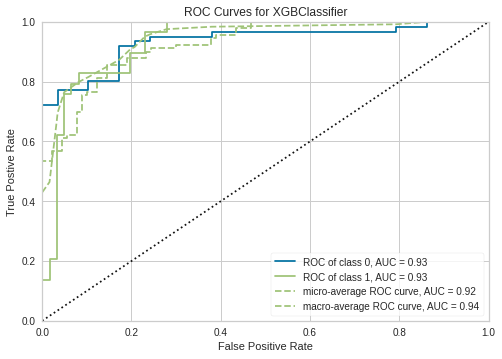

In [37]:
# Plot Performance of Model (AUC Default)
pc.plot_model(tuned_xgboost)

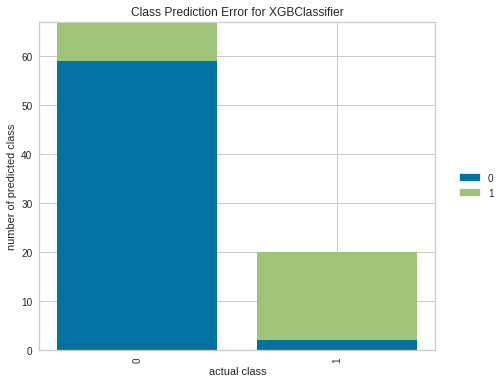

In [38]:
# Plot Prediction Error of Model
pc.plot_model(tuned_xgboost,plot='error')

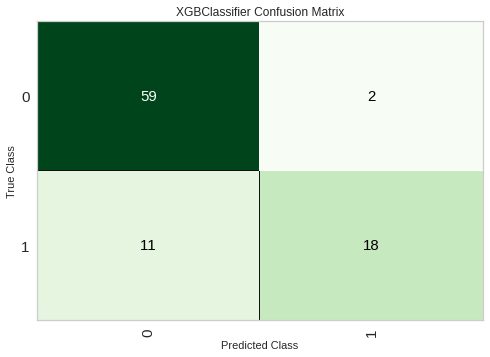

In [39]:
# Plot Confusion Matrix
pc.plot_model(tuned_xgboost,plot='confusion_matrix')

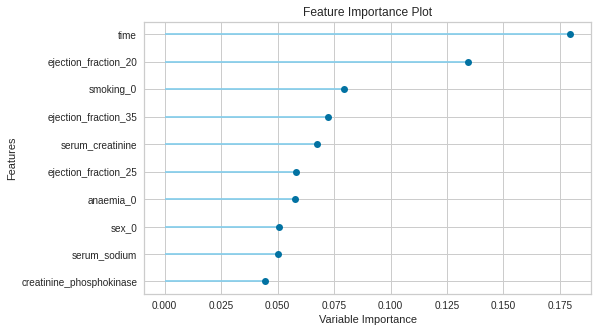

In [40]:
# Feature Importance
pc.plot_model(tuned_xgboost,plot='feature')

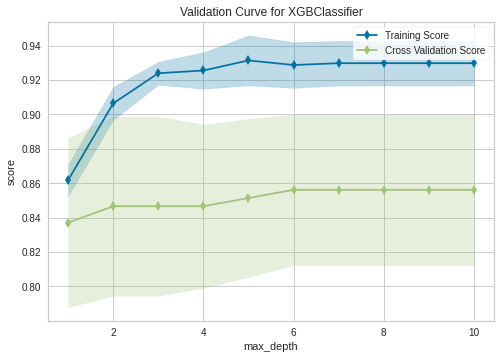

In [41]:
# Validation Curve
pc.plot_model(tuned_xgboost,plot='vc')

In [42]:
# optimize threshold for trained model
pc.optimize_threshold(tuned_xgboost, true_negative = 1500, false_negative = -5000)

Optimized Probability Threshold: 0.06 | Optimized Cost Function: 66000


In [43]:
# Save Models
pc.save_model(tuned_xgboost,'xgb_saved_model_04072020')

Transformation Pipeline and Model Succesfully Saved


In [44]:
# Loading the saved model
loaded_model = pc.load_model('xgb_saved_model_04072020')

Transformation Pipeline and Model Sucessfully Loaded


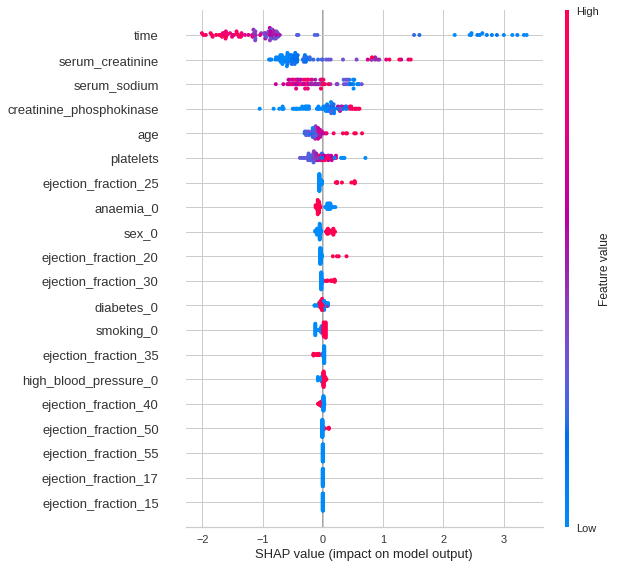

In [45]:
# Interpret Model
pc.interpret_model(tuned_xgboost)

In [46]:
# Finalize Model For Prediction
final_xgb_model = pc.finalize_model(tuned_xgboost)

### Making A Simple Prediction with PyCaret
+ Create A Dataframe
+ Dictionary (columns_name:values)

In [47]:
# Method 1
df.iloc[1]

age                             55.00
anaemia                          0.00
creatinine_phosphokinase      7861.00
diabetes                         0.00
ejection_fraction               38.00
high_blood_pressure              0.00
platelets                   263358.03
serum_creatinine                 1.10
serum_sodium                   136.00
sex                              1.00
smoking                          0.00
time                             6.00
class                            1.00
Name: 1, dtype: float64

In [48]:
df.iloc[[1]]

age  anaemia  creatinine_phosphokinase  diabetes  ...  sex  smoking  time  class
1  55.0        0                      7861         0  ...    1        0     6      1

[1 rows x 13 columns]

In [49]:
# We remove the target from the data
unseen_data = df.iloc[[1],:-1]

In [50]:
unseen_data

age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
1  55.0        0                      7861  ...    1        0     6

[1 rows x 12 columns]

In [51]:
type(unseen_data)

pandas.core.frame.DataFrame

In [52]:
# Predict with Model
prediction = pc.predict_model(final_xgb_model,data=unseen_data)

In [53]:
prediction

age  anaemia  creatinine_phosphokinase  ...  time  Label   Score
0  55.0        0                      7861  ...     6      1  0.9211

[1 rows x 14 columns]

In [54]:
# Method 2 (Dict=>Df)
df.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'class']

In [55]:
col_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [56]:
list(df.iloc[1])

[55.0, 0.0, 7861.0, 0.0, 38.0, 0.0, 263358.03, 1.1, 136.0, 1.0, 0.0, 6.0, 1.0]

In [57]:
sample_values = [55.0, 0.0, 7861.0, 0.0, 38.0, 0.0, 263358.03, 1.1, 136.0, 1.0, 0.0, 6.0]

In [58]:
d = dict(zip(col_names,sample_values))

In [59]:
d

{'age': 55.0,
 'anaemia': 0.0,
 'creatinine_phosphokinase': 7861.0,
 'diabetes': 0.0,
 'ejection_fraction': 38.0,
 'high_blood_pressure': 0.0,
 'platelets': 263358.03,
 'serum_creatinine': 1.1,
 'serum_sodium': 136.0,
 'sex': 1.0,
 'smoking': 0.0,
 'time': 6.0}

In [60]:
unseen_data2 = pd.DataFrame([d])

In [61]:
unseen_data2

age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
0  55.0      0.0                    7861.0  ...  1.0      0.0   6.0

[1 rows x 12 columns]

In [62]:
# Predict with Model
prediction2 = pc.predict_model(final_xgb_model,data=unseen_data2)

In [63]:
prediction2

age  anaemia  creatinine_phosphokinase  ...  time  Label   Score
0  55.0      0.0                    7861.0  ...   6.0      1  0.9514

[1 rows x 14 columns]